<a href="https://colab.research.google.com/github/mdalarmansorker/AI-and-ML/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.11.0


This code imports necessary libraries and prints the version number of TensorFlow installed in the environment. Here's a brief explanation of what the code does:

Imports the `matplotlib.pyplot` and `numpy` libraries to plot and manipulate data.

Imports the `os` library to access operating system functionality.

Imports the `tensorflow` library and prints the version number of TensorFlow installed in the environment using the print function. The printed version number may be useful for troubleshooting purposes or for checking compatibility with other libraries or code.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='cardataset.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('cardataset.zip')
f.keys()
!unzip cardataset.zip

Archive:  cardataset.zip
  inflating: Cars Dataset/test/Audi/1000.jpg  
  inflating: Cars Dataset/test/Audi/1003.jpg  
  inflating: Cars Dataset/test/Audi/1008.jpg  
  inflating: Cars Dataset/test/Audi/1020.jpg  
  inflating: Cars Dataset/test/Audi/1022.jpg  
  inflating: Cars Dataset/test/Audi/1025.jpg  
  inflating: Cars Dataset/test/Audi/1027.jpg  
  inflating: Cars Dataset/test/Audi/1038.jpg  
  inflating: Cars Dataset/test/Audi/104.jpg  
  inflating: Cars Dataset/test/Audi/1043.jpg  
  inflating: Cars Dataset/test/Audi/1051.jpg  
  inflating: Cars Dataset/test/Audi/1059.jpg  
  inflating: Cars Dataset/test/Audi/1060.jpg  
  inflating: Cars Dataset/test/Audi/1064.jpg  
  inflating: Cars Dataset/test/Audi/1066.jpg  
  inflating: Cars Dataset/test/Audi/1072.jpg  
  inflating: Cars Dataset/test/Audi/1073.jpg  
  inflating: Cars Dataset/test/Audi/1080.jpg  
  inflating: Cars Dataset/test/Audi/1084.jpg  
  inflating: Cars Dataset/test/Audi/1085.jpg  
  inflating: Cars Dataset/test/Audi/

This code downloads a file named 'cardataset.zip' from Google Drive using PyDrive and extracts its contents using the 'unzip' command. Here's a brief explanation of what the code does:

Installs the `PyDrive` library to allow access to Google Drive from Colab.

Imports the necessary classes from `PyDrive` and authenticates the user.

Retrieves the file ID for a file named 'cardataset.zip' from Google Drive and stores it in the fid variable.

Creates a PyDrive file object using the file ID and downloads the contents of the file to the local file system using the GetContentFile method. The downloaded file is named 'cardataset.zip'.

Prints the keys of the PyDrive file object f. This is not necessary and may be used for debugging purposes.

Extracts the contents of the 'cardataset.zip' file using the 'unzip' command.

In [ ]:
train_dir = '/content/Cars Dataset/train'
validation_dir = '/content/Cars Dataset/test'

BATCH_SIZE = 32
IMG_SIZE = (224, 224)
no_classes = 7

It seems like you are defining variables for a deep learning model that will be trained on the Cars Dataset. Here's a breakdown of what each variable means:

`train_dir`: The directory where the training images for the Cars Dataset are stored.

`validation_dir`: The directory where the validation images for the Cars Dataset are stored.

`BATCH_SIZE`: The number of images that will be fed into the model at once during training. In this case, it is set to 32.

`IMG_SIZE`: The size to which the images will be resized before being fed into the model. In this case, each image will be resized to 224 pixels wide by 224 pixels high.

`no_classes`: The number of classes in the Cars Dataset. In this case, there are 7 different classes of cars that the model will be trained to recognize.

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


Using the `tf.keras.utils.image_dataset_from_directory` function to create TensorFlow Dataset objects for the training and validation sets of the Cars Dataset. Here's a breakdown of what each argument means:

`train_dir`: The directory where the training images are stored.

`shuffle=True`: Whether to shuffle the order of the images in each batch. This can help improve training by preventing the model from memorizing the order of the images.

`batch_size=BATCH_SIZE`: The number of images to include in each batch of training data. This is set to the `BATCH_SIZE` variable that was defined earlier.

`image_size=IMG_SIZE`: The size to which each image should be resized. This is set to the IMG_SIZE variable that was defined earlier.

The `image_dataset_from_directory` function automatically creates labels for each image based on the name of the subdirectory in which the image is stored. For example, if there is a subdirectory called "sedan" in the train_dir directory, all images in that subdirectory will be labeled as belonging to the "sedan" class.

In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


Taking all the classnames of the training dataset in class_name variable and print the name of the all classes from training dataset

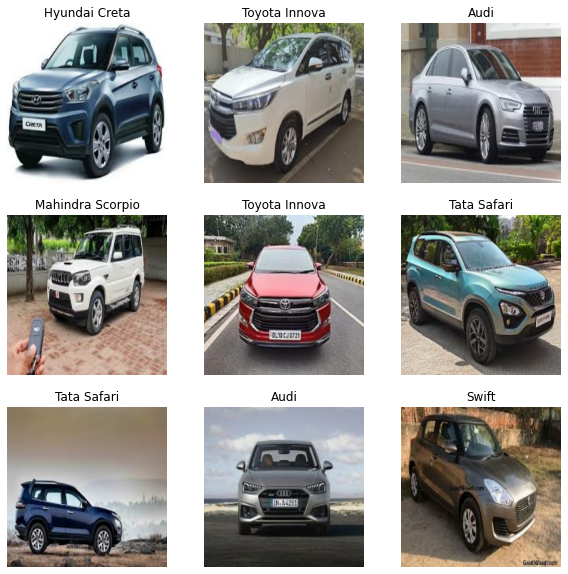

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

This code block is responsible for displaying a random selection of 9 images from the training dataset along with their corresponding labels.

The `figure()` function from `matplotlib` is used to create a new figure with a size of 10x10 inches.

The `take()` function from `TensorFlow` is used to select the first batch of `images` and `labels` from the training dataset. The for loop is used to iterate over the first 9 images and their corresponding labels.

For each image, the `subplot()` function from `matplotlib` is used to create a grid of 3x3 subplots. The `imshow()` function is used to display the image and the `title()` function is used to display the corresponding label. The `axis()` function is used to turn off the axis for each subplot.

Overall, this code block is useful for visualizing a sample of the images in the training dataset and their corresponding labels.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(224, 224, 3))
x = layers.RandomContrast(0.2)(inputs)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(no_classes, activation="softmax")(x)

model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 3)      0         
 rast)                                                           
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0     

This code block defines the architecture of the convolutional neural network (CNN) model using Keras API in TensorFlow.

The `Input()` function from Keras is used to define the shape of the input tensor, which is an image with a height and width of 224 pixels and 3 color channels (RGB).

The first layer in the model is a `RandomContrast()` layer which applies random contrast augmentation to the input images during training to improve model generalization.

The next two layers are convolutional layers (`Conv2D()`) with 32 and 64 filters, respectively. The filters are applied to the input image to extract features. The `kernel_size` argument defines the size of the convolutional filters, which is set to (3, 3) in this case. The activation argument defines the activation function applied to the output of each convolutional layer, which is set to `ReLU` in this case.

The following two layers are max pooling layers (`MaxPooling2D()`) which downsample the feature maps by taking the maximum value within a 2x2 window. This helps to reduce the spatial dimensionality of the output feature maps.

The next layer is a `Flatten()` layer which flattens the output of the previous layers into a 1D vector. This vector is then fed into a `Dropout()` layer which randomly drops out 50% of the nodes during training to prevent overfitting.

Finally, the output layer is a `Dense()` layer with `no_classes` number of units and a `softmax` activation function. This layer maps the input features to the output classes and produces a probability distribution over the 7 classes.

The `Model()` function from Keras is used to define the model and takes the input and output layers as arguments. 
The `summary()` function is used to print a summary of the model architecture.

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_dataset,
    epochs=25,
    validation_data=validation_dataset,
)

Epoch 1/25


105/105 [==============================] - 283s 3s/step - loss: 0.1336 - accuracy: 0.9627 - val_loss: 4.9835 - val_accuracy: 0.5658
Epoch 2/25
105/105 [==============================] - 281s 3s/step - loss: 0.1213 - accuracy: 0.9675 - val_loss: 5.8127 - val_accuracy: 0.5584
Epoch 3/25
105/105 [==============================] - 277s 3s/step - loss: 0.1019 - accuracy: 0.9746 - val_loss: 4.9252 - val_accuracy: 0.5720
Epoch 4/25
105/105 [==============================] - 274s 3s/step - loss: 0.1821 - accuracy: 0.9615 - val_loss: 5.3094 - val_accuracy: 0.5560
Epoch 5/25
105/105 [==============================] - 269s 3s/step - loss: 0.1076 - accuracy: 0.9791 - val_loss: 7.1206 - val_accuracy: 0.5646
Epoch 6/25
105/105 [==============================] - 275s 3s/step - loss: 0.0906 - accuracy: 0.9815 - val_loss: 6.5749 - val_accuracy: 0.5658
Epoch 7/25
105/105 [==============================] - 271s 3s/step - loss: 0.0767 - accuracy: 0.9863 - val_loss: 7.1692 - val_accuracy: 0.5756
Epoch 8/25

The code snippet you provided is using the Keras API to compile and fit a neural network model. Here's a breakdown of what's happening:

The `compile()` method is used to specify the optimizer, loss function, and metrics to be used during training. In this case, the optimizer being used is Adam with a learning rate of 1e-3, the loss function is sparse categorical crossentropy, and the metric being tracked during training is accuracy.

The `fit()` method is used to train the model using the train_dataset and validation_dataset data. The `epochs` parameter specifies the number of times the model should iterate over the entire dataset during training.

During training, the model will optimize its parameters (weights and biases) to minimize the loss function (sparse categorical crossentropy) using the Adam optimizer. The accuracy metric will be calculated at each iteration and reported to monitor the progress of training.

After training is completed, the model will be able to make predictions on new data using the learned weights and biases.